# Imports

In [256]:
import sys
import random
import time
from pprint import pp
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
print(f"{sys.version=}")

sys.version='3.14.0 (main, Oct  7 2025, 09:34:52) [Clang 17.0.0 (clang-1700.3.19.1)]'


In [2]:
import requests

def get(url: str, params: dict = {}, headers: dict = {}):
    headers = {**headers, "HH-User-Agent": "Skill Lens/1.0 (loveyousomuch554@gmail.com)"}
    params = {**params}
    res = requests.get(url=url, params=params, headers=headers)
    res.raise_for_status()
    return res.json()

# Справочники полей
Справочники полей и сущностей, используемых в API. Значения в справочниках могут поменяться в любой момент.

In [21]:
fields_dict = get("https://api.hh.ru/dictionaries")

In [27]:
list(fields_dict.keys())

['resume_access_type',
 'vacancy_search_order',
 'vacancy_search_fields',
 'vacancy_search_employment_form',
 'gender',
 'preferred_contact_type',
 'travel_time',
 'relocation_type',
 'business_trip_readiness',
 'resume_contacts_site_type',
 'employer_type',
 'employer_relation',
 'negotiations_state',
 'applicant_negotiation_status',
 'negotiations_participant_type',
 'negotiations_order',
 'resume_moderation_note',
 'vacancy_relation',
 'resume_status',
 'resume_search_logic',
 'resume_search_fields',
 'messaging_status',
 'employer_active_vacancies_order',
 'employer_archived_vacancies_order',
 'employer_hidden_vacancies_order',
 'applicant_comments_order',
 'vacancy_not_prolonged_reason',
 'resume_hidden_fields',
 'phone_call_status',
 'linked_socials',
 'vacancy_label',
 'experience',
 'employment',
 'schedule',
 'education_level',
 'currency',
 'vacancy_billing_type',
 'applicant_comment_access_type',
 'vacancy_cluster',
 'driver_license_types',
 'language_level',
 'working_days'

## Область поиска для /vacancies?search_field=

In [138]:
fields_dict['vacancy_search_fields']

[{'id': 'name', 'name': 'в названии вакансии'},
 {'id': 'company_name', 'name': 'в названии компании'},
 {'id': 'description', 'name': 'в описании вакансии'}]

## Опыт работы для /vacancies?experience=

In [139]:
fields_dict['experience'] 

[{'id': 'noExperience', 'name': 'Нет опыта'},
 {'id': 'between1And3', 'name': 'От 1 года до 3 лет'},
 {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 {'id': 'moreThan6', 'name': 'Более 6 лет'}]

## Все возможные группы кластеров для поиска вакансий
https://api.hh.ru/openapi/redoc#tag/Poisk-vakansij/Klastery-v-poiske-vakansij

In [29]:
len(fields_dict['vacancy_cluster'])

19

In [26]:
fields_dict['vacancy_cluster']

[{'id': 'area', 'name': 'Регион'},
 {'id': 'metro', 'name': 'Метро'},
 {'id': 'salary', 'name': 'Уровень дохода'},
 {'id': 'industry', 'name': 'Отрасль компании'},
 {'id': 'sub_industry', 'name': 'Сфера компании'},
 {'id': 'experience', 'name': 'Опыт работы'},
 {'id': 'employment', 'name': 'Тип занятости'},
 {'id': 'schedule', 'name': 'График работы'},
 {'id': 'label', 'name': 'Исключение'},
 {'id': 'professional_role', 'name': 'Профессиональная роль'},
 {'id': 'district', 'name': 'Район'},
 {'id': 'education', 'name': 'Образование'},
 {'id': 'accept_temporary',
  'name': 'оформление по ГПХ или по совместительству'},
 {'id': 'employment_form', 'name': 'Тип занятости'},
 {'id': 'work_schedule_by_days', 'name': 'График работы'},
 {'id': 'working_hours', 'name': 'Рабочие часы в день'},
 {'id': 'work_format', 'name': 'Формат работы'},
 {'id': 'salary_frequency', 'name': 'Частота выплат'},
 {'id': 'salary_per_mode', 'name': 'Уровень дохода'}]

## Данные по кластерам 
https://api.hh.ru/openapi/redoc#tag/Poisk-vakansij/Klastery-v-poiske-vakansij

In [34]:
clusters_values = get("https://api.hh.ru/vacancies", params={"clusters": "true", "per_page": "0"})

In [37]:
len(clusters_values)

10

In [38]:
clusters_values.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

In [45]:
len(clusters_values['clusters'])

11

In [80]:
[(c['name'], c['id']) for c in clusters_values['clusters']]

[('Регион', 'area'),
 ('Уровень дохода', 'salary'),
 ('Отрасль компании', 'industry'),
 ('Опыт работы', 'experience'),
 ('Тип занятости', 'employment'),
 ('График работы', 'schedule'),
 ('Исключение', 'label'),
 ('Профессиональная роль', 'professional_role'),
 ('Образование', 'education'),
 ('оформление по ГПХ или по совместительству', 'accept_temporary'),
 ('Частота выплат', 'salary_frequency')]

### Area

In [81]:
area = next(c for c in clusters_values['clusters'] if c['id'] == 'area')
area.keys()

dict_keys(['name', 'id', 'items'])

In [83]:
len(area['items'])

397

In [94]:
random.sample(area['items'], k=10)

[{'name': 'Ульяновская область',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&area=1614',
  'count': 5817},
 {'name': 'Чехия',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&area=199',
  'count': 3},
 {'name': 'Новгородская область',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&area=1051',
  'count': 3234},
 {'name': 'Новосибирская область',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&area=1202',
  'count': 20772},
 {'name': 'Могилев',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&area=1004',
  'count': 1185},
 {'name': 'Денау',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&area=2872',
  'count': 14},
 {'name': 'Гянджа',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&area=2494',
  'count': 4},
 {'name': 'Чартак',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&area=2925',
  'count': 1},
 {'name': 'Жезказган',
  'url': 'https://api.hh.ru/vacancies?clust

### Salary

In [95]:
salary = next(c for c in clusters_values['clusters'] if c['id'] == 'salary')
salary.keys()

dict_keys(['name', 'id', 'items'])

In [96]:
salary

{'name': 'Уровень дохода',
 'id': 'salary',
 'items': [{'name': 'Указан',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&only_with_salary=true',
   'count': 827318},
  {'name': 'от 75000 ₽',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&only_with_salary=true&salary=75000',
   'count': 573375},
  {'name': 'от 155000 ₽',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&only_with_salary=true&salary=155000',
   'count': 188024},
  {'name': 'от 235000 ₽',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&only_with_salary=true&salary=235000',
   'count': 66820},
  {'name': 'от 315000 ₽',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&only_with_salary=true&salary=315000',
   'count': 19360},
  {'name': 'от 395000 ₽',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&only_with_salary=true&salary=395000',
   'count': 9278}]}

### industry

In [108]:
industry = next(c for c in clusters_values['clusters'] if c['id'] == 'industry')
industry.keys()

dict_keys(['name', 'id', 'items'])

In [110]:
len(industry['items'])

30

In [114]:
random.sample(industry['items'], k=10)

[{'name': 'СМИ, маркетинг, реклама, BTL, PR, дизайн, продюсирование',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&industry=11',
  'count': 14661},
 {'name': 'Химическое производство, удобрения',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&industry=34',
  'count': 10690},
 {'name': 'Перевозки, логистика, склад, ВЭД',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&industry=5',
  'count': 40325},
 {'name': 'Общественная деятельность, партии, благотворительность, НКО',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&industry=37',
  'count': 857},
 {'name': 'Гостиницы, рестораны, общепит, кейтеринг',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&industry=50',
  'count': 34696},
 {'name': 'Искусство, культура',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&industry=52',
  'count': 936},
 {'name': 'Управление многопрофильными активами',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per

### experience

In [117]:
experience = next(c for c in clusters_values['clusters'] if c['id'] == 'experience')
experience.keys()

dict_keys(['name', 'id', 'items'])

In [118]:
experience

{'name': 'Опыт работы',
 'id': 'experience',
 'items': [{'name': 'От 1 года до 3 лет',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&experience=between1And3',
   'count': 421491},
  {'name': 'Нет опыта',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&experience=noExperience',
   'count': 416045},
  {'name': 'От 3 до 6 лет',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&experience=between3And6',
   'count': 132751},
  {'name': 'Более 6 лет',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&experience=moreThan6',
   'count': 19412}]}

### employment

In [119]:
employment = next(c for c in clusters_values['clusters'] if c['id'] == 'employment')
employment.keys()

dict_keys(['name', 'id', 'items'])

In [120]:
employment

{'name': 'Тип занятости',
 'id': 'employment',
 'items': [{'name': 'Полная занятость',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&employment=full',
   'count': 902692},
  {'name': 'Частичная занятость',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&employment=part',
   'count': 84087},
  {'name': 'Проектная работа',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&employment=project',
   'count': 2909},
  {'name': 'Стажировка',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&employment=probation',
   'count': 11}]}

### schedule

In [121]:
schedule = next(c for c in clusters_values['clusters'] if c['id'] == 'schedule')
schedule.keys()

dict_keys(['name', 'id', 'items'])

In [122]:
schedule

{'name': 'График работы',
 'id': 'schedule',
 'items': [{'name': 'Полный день',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&schedule=fullDay',
   'count': 603299},
  {'name': 'Сменный график',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&schedule=shift',
   'count': 127225},
  {'name': 'Вахтовый метод',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&schedule=flyInFlyOut',
   'count': 114395},
  {'name': 'Гибкий график',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&schedule=flexible',
   'count': 87353},
  {'name': 'Удаленная работа',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&schedule=remote',
   'count': 57427}]}

### label

In [123]:
label = next(c for c in clusters_values['clusters'] if c['id'] == 'label')
label.keys()

dict_keys(['name', 'id', 'items'])

In [124]:
label

{'name': 'Исключение',
 'id': 'label',
 'items': [{'name': 'Без вакансий агентств',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&label=not_from_agency',
   'count': 908727},
  {'name': 'Указан доход',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&label=with_salary',
   'count': 827317},
  {'name': 'Только с адресом',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&label=with_address',
   'count': 799345},
  {'name': 'Только вакансии, у которых меньше 10 откликов',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&label=low_performance',
   'count': 402567},
  {'name': 'Вечерние или ночные смены',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&label=night_shifts',
   'count': 108356},
  {'name': 'Стажировка',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&label=internship',
   'count': 45932},
  {'name': 'Только доступные для людей с инвалидностью',
   'url': 'https://api.hh.ru/vacancies

### professional_role

In [125]:
professional_role = next(c for c in clusters_values['clusters'] if c['id'] == 'professional_role')
professional_role.keys()

dict_keys(['name', 'id', 'items'])

In [127]:
len(professional_role['items'])

174

In [130]:
random.sample(professional_role['items'], k=10)

[{'name': 'Менеджер продукта',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&professional_role=73',
  'count': 2147},
 {'name': 'Офис-менеджер',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&professional_role=88',
  'count': 3286},
 {'name': 'Инженер-энергетик, инженер-электрик',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&professional_role=144',
  'count': 4182},
 {'name': 'Воспитатель, няня',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&professional_role=23',
  'count': 2301},
 {'name': 'Администратор магазина, администратор торгового зала',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&professional_role=9',
  'count': 9837},
 {'name': 'Хостес',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&professional_role=140',
  'count': 1428},
 {'name': 'Геодезист',
  'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&professional_role=27',
  'count': 1304},
 {'name': 'Начальник сме

### education

In [132]:
education = next(c for c in clusters_values['clusters'] if c['id'] == 'education')
education.keys()

dict_keys(['name', 'id', 'items'])

In [133]:
education

{'name': 'Образование',
 'id': 'education',
 'items': [{'name': 'Не\xa0требуется или не\xa0указано',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&education=not_required_or_not_specified',
   'count': 728807},
  {'name': 'Высшее',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&education=higher',
   'count': 207396},
  {'name': 'Среднее профессиональное',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&education=special_secondary',
   'count': 97277}]}

### accept_temporary

In [134]:
accept_temporary = next(c for c in clusters_values['clusters'] if c['id'] == 'accept_temporary')
accept_temporary.keys()

dict_keys(['name', 'id', 'items'])

In [135]:
accept_temporary

{'name': 'оформление по ГПХ или по совместительству',
 'id': 'accept_temporary',
 'items': [{'name': 'оформление по ГПХ или по совместительству',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&accept_temporary=true',
   'count': 101316}]}

### salary_frequency

In [136]:
salary_frequency = next(c for c in clusters_values['clusters'] if c['id'] == 'salary_frequency')
salary_frequency.keys()

dict_keys(['name', 'id', 'items'])

In [137]:
salary_frequency

{'name': 'Частота выплат',
 'id': 'salary_frequency',
 'items': [{'name': 'Два раза в месяц',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&salary_frequency=TWICE_PER_MONTH',
   'count': 465932},
  {'name': 'Раз в месяц',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&salary_frequency=MONTHLY',
   'count': 29136},
  {'name': 'Раз в неделю',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&salary_frequency=WEEKLY',
   'count': 23283},
  {'name': 'Ежедневно',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&salary_frequency=DAILY',
   'count': 19048},
  {'name': 'За проект',
   'url': 'https://api.hh.ru/vacancies?clusters=true&per_page=0&salary_frequency=PER_PROJECT',
   'count': 2246}]}

### All in

In [75]:
for cluster in clusters_values['clusters']:
    print(f'Cluster: {cluster["name"]!r}, ID: {cluster["id"]!r}')
    batch_size = 5
    cluster_items_text = ',\n'.join("\t"+', '.join(item['name'] for item in cluster['items'][i:i+batch_size]) for i in range(0, len(cluster['items']), batch_size))
    print(cluster_items_text)
    print()

Cluster: 'Регион', ID: 'area'
	Россия, Москва, Московская область, Санкт-Петербург, Казахстан,
	Краснодарский край, Свердловская область, Беларусь, Республика Татарстан, Пермский край,
	Ростовская область, Новосибирская область, Нижегородская область, Республика Башкортостан, Самарская область,
	Челябинская область, Красноярский край, Алматы, Саратовская область, Воронежская область,
	Минск, Ленинградская область, Иркутская область, Тюменская область, Омская область,
	Хабаровский край, Тульская область, Узбекистан, Приморский край, Кемеровская область,
	Волгоградская область, Владимирская область, Алтайский край, Удмуртская Республика, Ташкент,
	Калужская область, Ярославская область, Астана, Ставропольский край, Тверская область,
	Ханты-Мансийский АО - Югра, Белгородская область, Рязанская область, Оренбургская область, Калининградская область,
	Республика Крым, Кировская область, Томская область, Ульяновская область, Вологодская область,
	Липецкая область, Пензенская область, Чувашск

# Дерево всех регионов
Возвращает древовидный список всех регионов.

Значения в справочнике могут поменяться в любой момент.

In [8]:
areas = get("https://api.hh.ru/areas")

In [9]:
len(areas)

9

In [10]:
[a['name'] for a in areas]

['Россия',
 'Украина',
 'Казахстан',
 'Азербайджан',
 'Беларусь',
 'Грузия',
 'Другие регионы',
 'Кыргызстан',
 'Узбекистан']

In [11]:
areas[0].keys()

dict_keys(['id', 'parent_id', 'name', 'areas'])

In [160]:
for area in areas:
    print(area['name'])
    print(len(area['areas']))

Россия
88
Украина
21
Казахстан
195
Азербайджан
53
Беларусь
12
Грузия
27
Другие регионы
156
Кыргызстан
46
Узбекистан
116


## Дерево всех регионов визуально

In [140]:
def recursive_areas_tree_print(areas, indent_level=0, file=sys.stdout):
    level_print = lambda *args, **kwargs: print('|\t'*indent_level+'|--', file=file, *args, **kwargs)
    total_regions_count = 0
    for area in areas:
        regions_count_text = f"(Включает {len(area.get('areas', []))} регионов)" if len(area.get('areas', [])) else ""
        level_print(area.get('name'), regions_count_text)
        recursive_areas_tree_print(area['areas'], indent_level=indent_level+1, file=file)

In [141]:
with open('hhru_all_areas_tree_example.txt', 'w') as file:
    recursive_areas_tree_print(areas, file=file)

In [142]:
!head -n10 hhru_all_areas_tree_example.txt

|-- Россия (Включает 88 регионов)
|	|-- Республика Марий Эл (Включает 34 регионов)
|	|	|-- Виловатово 
|	|	|-- Волжск 
|	|	|-- Звенигово 
|	|	|-- Знаменский 
|	|	|-- Йошкар-Ола 
|	|	|-- Кельмаксола 
|	|	|-- Килемары 
|	|	|-- Козьмодемьянск 


### Пример Беларусь

In [143]:
country = 'Беларусь'
country_areas = next(a.get('areas', []) for a in areas if a['name'] == country) or []
print('|--', country, f"(Включает {len(country_areas)} регионов)")
recursive_areas_tree_print(country_areas, indent_level=1)

|-- Беларусь (Включает 12 регионов)
|	|-- Брест 
|	|-- Брестская область (Включает 41 регионов)
|	|	|-- Антополь 
|	|	|-- Барановичи 
|	|	|-- Белоозерск 
|	|	|-- Береза 
|	|	|-- Большие Лепесы 
|	|	|-- Большие Мотыкалы 
|	|	|-- Вишевичи 
|	|	|-- Высокое 
|	|	|-- Галево 
|	|	|-- Ганцевичи 
|	|	|-- Давид-Городок 
|	|	|-- Домачево 
|	|	|-- Дрогичин 
|	|	|-- Еремичи 
|	|	|-- Жабинка 
|	|	|-- Жемчужный 
|	|	|-- Иваново (Брестская область) 
|	|	|-- Ивацевичи 
|	|	|-- Каменец 
|	|	|-- Кобрин 
|	|	|-- Коссово 
|	|	|-- Ленинский (Брестская область) 
|	|	|-- Логишин 
|	|	|-- Лунинец 
|	|	|-- Ляховичи 
|	|	|-- Малеч 
|	|	|-- Малорита 
|	|	|-- Микашевичи 
|	|	|-- Мотоль 
|	|	|-- Ольшаны (Столинский район) 
|	|	|-- Остромечево 
|	|	|-- Пинковичи 
|	|	|-- Пинск 
|	|	|-- Пружаны 
|	|	|-- Рубель 
|	|	|-- Ружаны 
|	|	|-- Столин 
|	|	|-- Телеханы 
|	|	|-- Хомск 
|	|	|-- Чернавчицы 
|	|	|-- Черни 
|	|-- Витебск 
|	|-- Витебская область (Включает 41 регионов)
|	|	|-- Азино 
|	|	|-- Андреевщина 
|	|	|-- Ба

# Остальные фильтры - [дока /vacancies](https://api.hh.ru/openapi/redoc#tag/Poisk-vakansij/operation/get-vacancies)

# Grid requests - запрос макс кол-ва уникальных вакансий

In [184]:
%%time

# ISO 8601 (YYYY-MM-DD) или с точностью до секунды YYYY-MM-DDThh:mm:ss±hhmm
date_from = "2025-11-24"
date_to = "2025-11-24"

# number <= 100, default 10
per_page = 100

query_params = {
    "date_from": date_from,
    "date_to": date_to,
    "per_page": per_page,
}

vacancies = get("https://api.hh.ru/vacancies", params=query_params)
vacancies_response_info = {key: vacancies.get(key, 'Not found') for key in vacancies.keys() if key!='items'}
vacancies_response_info

CPU times: user 28.5 ms, sys: 5.19 ms, total: 33.7 ms
Wall time: 791 ms


{'found': 77203,
 'pages': 20,
 'page': 0,
 'per_page': 100,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?date_from=24.11.2025&date_to=24.11.2025+23%3A59%3A59&enable_snippets=true&items_on_page=100'}

## Перебор /vacancies за день(date_from, date_to) по странам(корневые id /areas)

In [4]:
# ISO 8601 (YYYY-MM-DD) или с точностью до секунды YYYY-MM-DDThh:mm:ss±hhmm
date_from = "2025-11-24"
date_to = "2025-11-24"
# number <= 100, default 10
per_page = 100
# ?x= query string
query_params = {
    "date_from": date_from,
    "date_to": date_to,
    "per_page": per_page,
}
areas = get("https://api.hh.ru/areas")
area_ids = {a.get('name'): a.get('id') for a in areas}
area_ids

{'Россия': '113',
 'Украина': '5',
 'Казахстан': '40',
 'Азербайджан': '9',
 'Беларусь': '16',
 'Грузия': '28',
 'Другие регионы': '1001',
 'Кыргызстан': '48',
 'Узбекистан': '97'}

In [5]:
%%time
list_of_found_items = list()
for name, area_id in area_ids.items():
    query_params['area'] = area_id
    vacancies = get("https://api.hh.ru/vacancies", params=query_params)
    vacancies_response_info = {key: vacancies.get(key, 'Not found') for key in vacancies.keys() if key!='items'}
    list_of_found_items.append(vacancies_response_info.get('found', 0))
    print(name, area_id)
    pp(vacancies_response_info)
    print()
    time.sleep(1)

Россия 113
{'found': 80127,
 'pages': 20,
 'page': 0,
 'per_page': 100,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?area=113&date_from=24.11.2025&date_to=24.11.2025+23%3A59%3A59&enable_snippets=true&items_on_page=100'}

Украина 5
{'found': 1,
 'pages': 1,
 'page': 0,
 'per_page': 100,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?area=5&date_from=24.11.2025&date_to=24.11.2025+23%3A59%3A59&enable_snippets=true&items_on_page=100'}

Казахстан 40
{'found': 3218,
 'pages': 20,
 'page': 0,
 'per_page': 100,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?area=40&date_from=24.11.2025&date_to=24.11.2025+23%3A59%3A59&enable_snippets=true&items_on_page=100'}

Азербайджан 9
{'found': 11,
 'pages': 1,
 'page': 0,
 'per_page': 100,
 'clusters': None,
 'arguments': None,
 'fi

In [6]:
list_of_found_items

[80127, 1, 3218, 11, 1669, 26, 73, 268, 773]

In [7]:
pd.Series(list_of_found_items).describe()

count        9.000000
mean      9574.000000
std      26479.235757
min          1.000000
25%         26.000000
50%        268.000000
75%       1669.000000
max      80127.000000
dtype: float64

## Перебор /vacancies за день(date_from, date_to) по кластерам /vacancies?clusters=true для area

In [144]:
# ISO 8601 (YYYY-MM-DD) или с точностью до секунды YYYY-MM-DDThh:mm:ss±hhmm
date_from = "2025-11-24"
date_to = "2025-11-24"
# number <= 100, default 10
per_page = 100
# ?x= query string
query_params = {
    "date_from": date_from,
    "date_to": date_to,
    "per_page": per_page,
}
clusters_values = get("https://api.hh.ru/vacancies", params={"clusters": "true", "per_page": "0"})
area = next(c for c in clusters_values['clusters'] if c['id'] == 'area')
area.keys()

dict_keys(['name', 'id', 'items'])

In [153]:
vacancies = get("https://api.hh.ru/vacancies", params={"clusters": "true",})

In [154]:
len(vacancies['items'])

20

In [155]:
len(vacancies['clusters'])

11

In [156]:
[c.get('name') for c in vacancies['clusters']]

['Регион',
 'Уровень дохода',
 'Отрасль компании',
 'Опыт работы',
 'Тип занятости',
 'График работы',
 'Исключение',
 'Профессиональная роль',
 'Образование',
 'оформление по ГПХ или по совместительству',
 'Частота выплат']

In [164]:
vacancies['clusters'][0]['items'][0]

{'name': 'Россия',
 'url': 'https://api.hh.ru/vacancies?clusters=true&area=113',
 'count': 924539}

In [162]:
for cluster in vacancies['clusters']:
    print(cluster['name'], len(cluster['items']))

Регион 398
Уровень дохода 6
Отрасль компании 30
Опыт работы 4
Тип занятости 4
График работы 5
Исключение 10
Профессиональная роль 174
Образование 3
оформление по ГПХ или по совместительству 1
Частота выплат 5


## Перебор /vacancies за день(date_from, date_to) по топ регионам

In [165]:
areas = get("https://api.hh.ru/areas")

In [200]:
top_areas = dict()
for root_area in areas:
    for top_area in root_area['areas']:
        top_areas[top_area['name']] = top_area['id']
len(top_areas)

714

In [223]:
_random_keys = random.sample(list(top_areas.keys()), k=100)
sub_sample_top_areas = {k: v for k,v in top_areas.items() if k in _random_keys}
len(sub_sample_top_areas)

100

In [224]:
','.join(sub_sample_top_areas.keys()) 

'Забайкальский край,Красноярский край,Запорожская область,Архангельская область,Смоленская область,Пензенская область,Саратовская область,Свердловская область,Кабардино-Балкарская республика,Тульская область,Одесская область,Харьковская область,Черновицкая область,Айтеке-Би,Аксу (Павлодар.обл),Аркалык,Атбасар,Байсерке ( Алматинская область),Глубокое (Восточно-Казахстанская область),Державинск,Жетысу,Житикара,Казалы (Кызылорд. обл),Казыгурт,Каратобе,Каргалы,Каскелен,Кокшетау,Кушмурун,Кызылорда,Матай,Павлодар,Приозёрск (Карагандинская область),Риддер (ВКО),Рыскулово,Сайхин,Сарыозек,Село имени Турара Рыскулова,Степногорск,Теренозек,Торткудук,Усть-Каменогорск,Чарск (Шар),Шамалган,Шахтинск,Агдаш,Аджигабул,Баку,Ленкорань,Нефтечала,Шабран,Гродненская область,Сагареджо,Бразилия,Гвинея,Демократическая Республика Конго,Замбия,Израиль,Индонезия,Иордания,Испания,Камбоджа,Катар,Кипр,Китай,Кооперативная Республика Гайана,Новая Зеландия,Норвегия,Парагвай,Польша,Республика Бенин,Республика Мадагаскар,

In [226]:
%%time
list_of_found_items = list()
for name, area_id in sub_sample_top_areas.items():
    query_params['area'] = area_id
    vacancies = get("https://api.hh.ru/vacancies", params=query_params)
    vacancies_response_info = {key: vacancies.get(key, 'Not found') for key in vacancies.keys() if key!='items'}
    list_of_found_items.append(vacancies_response_info.get('found', 0))
    print(name, area_id)
    pp(vacancies_response_info)
    print()
    time.sleep(1)

Забайкальский край 1192
{'found': 532,
 'pages': 6,
 'page': 0,
 'per_page': 100,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?area=1192&date_from=24.11.2025&date_to=24.11.2025+23%3A59%3A59&enable_snippets=true&items_on_page=100'}

Красноярский край 1146
{'found': 2335,
 'pages': 20,
 'page': 0,
 'per_page': 100,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?area=1146&date_from=24.11.2025&date_to=24.11.2025+23%3A59%3A59&enable_snippets=true&items_on_page=100'}

Запорожская область 2155
{'found': 20,
 'pages': 1,
 'page': 0,
 'per_page': 100,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?area=2155&date_from=24.11.2025&date_to=24.11.2025+23%3A59%3A59&enable_snippets=true&items_on_page=100'}

Архангельская область 1008
{'found': 414,
 'pages': 5,
 'page': 0,
 'per

In [227]:
list_of_found_items

[532,
 2335,
 20,
 414,
 543,
 832,
 2479,
 4677,
 132,
 1374,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 7,
 0,
 0,
 0,
 0,
 9,
 63,
 0,
 20,
 0,
 89,
 0,
 5,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 117,
 0,
 0,
 1,
 0,
 0,
 17,
 0,
 0,
 0,
 41,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 22,
 10,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 1,
 9,
 1,
 0,
 0,
 0,
 356,
 8,
 0,
 14,
 0,
 0,
 0,
 0,
 4,
 12,
 14,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 13,
 0,
 0]

In [234]:
pd.Series(list_of_found_items).describe()

count     100.000000
mean      141.980000
std       594.246471
min         0.000000
25%         0.000000
50%         0.000000
75%         8.250000
max      4677.000000
dtype: float64

## Кол-во опубликованных вакансий по дням за последние 90 дней

In [253]:
dates_pd = pd.date_range(end=pd.Timestamp.now().date(), periods=90)
# Форматируем в строки YYYY-MM-DD
formatted_dates = dates_pd.strftime('%Y-%m-%d').tolist()
print(formatted_dates)

['2025-08-28', '2025-08-29', '2025-08-30', '2025-08-31', '2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04', '2025-09-05', '2025-09-06', '2025-09-07', '2025-09-08', '2025-09-09', '2025-09-10', '2025-09-11', '2025-09-12', '2025-09-13', '2025-09-14', '2025-09-15', '2025-09-16', '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20', '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24', '2025-09-25', '2025-09-26', '2025-09-27', '2025-09-28', '2025-09-29', '2025-09-30', '2025-10-01', '2025-10-02', '2025-10-03', '2025-10-04', '2025-10-05', '2025-10-06', '2025-10-07', '2025-10-08', '2025-10-09', '2025-10-10', '2025-10-11', '2025-10-12', '2025-10-13', '2025-10-14', '2025-10-15', '2025-10-16', '2025-10-17', '2025-10-18', '2025-10-19', '2025-10-20', '2025-10-21', '2025-10-22', '2025-10-23', '2025-10-24', '2025-10-25', '2025-10-26', '2025-10-27', '2025-10-28', '2025-10-29', '2025-10-30', '2025-10-31', '2025-11-01', '2025-11-02', '2025-11-03', '2025-11-04', '2025-11-05', '2025-11-06', '2025

In [257]:
%%time
vacancies_count_per_day = list()
for report_dt in tqdm(formatted_dates):
    # ISO 8601 (YYYY-MM-DD) или с точностью до секунды YYYY-MM-DDThh:mm:ss±hhmm
    # date_from = f"2025-11-{day:02d}"
    date_from = date_to = report_dt
    # number <= 100, default 10
    per_page = 100
    query_params = {
        "date_from": date_from,
        "date_to": date_to,
        "per_page": per_page,
    }
    vacancies = get("https://api.hh.ru/vacancies", params=query_params)
    vacancies_response_info = {key: vacancies.get(key, 'Not found') for key in vacancies.keys() if key!='items'}
    # pp(vacancies_response_info)
    vacancies_count_per_day.append(vacancies_response_info['found'])
    time.sleep(.5)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [02:47<00:00,  1.86s/it]

CPU times: user 3.03 s, sys: 607 ms, total: 3.64 s
Wall time: 2min 47s


In [262]:
print(vacancies_count_per_day)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 62, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 0, 1, 1, 2, 0, 0, 2, 0, 5, 2, 5, 0, 1, 3, 13, 56, 5, 5, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2205, 25908, 24115, 24458, 23247, 21242, 21840, 4394, 7313, 8268, 39177, 30740, 28277, 4647, 4727, 43051, 38555, 37563, 39953, 39866, 5809, 5286, 50579, 43496, 43978, 39965, 46746, 39983, 65166, 151003, 63177]


In [258]:
pd.Series(vacancies_count_per_day).describe()

count        90.000000
mean      11388.200000
std       22714.613036
min           0.000000
25%           0.000000
50%           1.000000
75%       17998.500000
max      151003.000000
dtype: float64

In [267]:
skip_first_two_zero_months = 60
pd.Series(vacancies_count_per_day[skip_first_two_zero_months:]).describe()

count        30.000000
mean      34084.300000
std       27999.395288
min        4394.000000
25%       21391.500000
50%       34151.500000
75%       42284.000000
max      151003.000000
dtype: float64

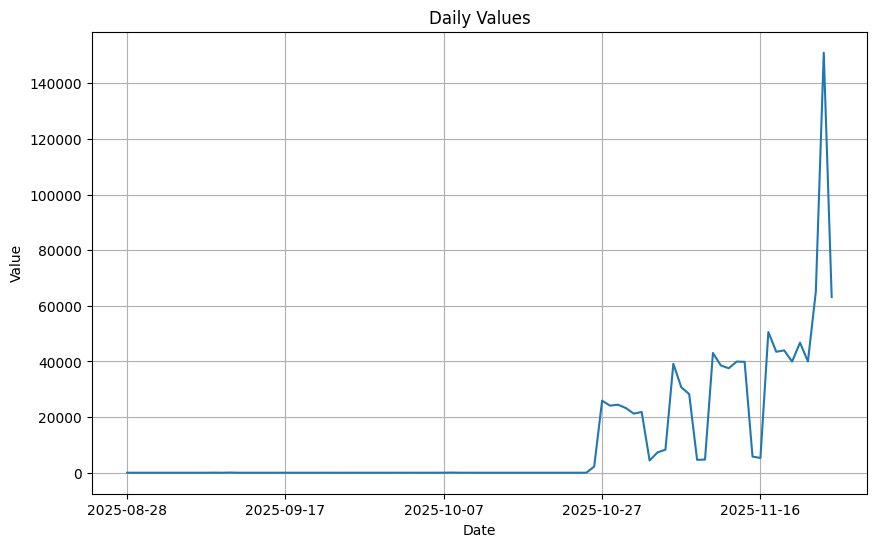

In [260]:
s = pd.Series(vacancies_count_per_day)
s.index = formatted_dates
s.plot(kind='line', figsize=(10, 6), title='Daily Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

### Максимальная глубина запроса 1 месяц

In [264]:
per_page = 100
query_params = {
    "date_from": '2025-08-28',
    "date_to": '2025-08-28',
    "per_page": per_page,
}
vacancies = get("https://api.hh.ru/vacancies", params=query_params)
vacancies_response_info = {key: vacancies.get(key, 'Not found') for key in vacancies.keys() if key!='items'}
pp(vacancies_response_info)

{'found': 0,
 'pages': 1,
 'page': 0,
 'per_page': 100,
 'clusters': None,
 'arguments': None,
 'fixes': None,
 'suggests': None,
 'alternate_url': 'https://hh.ru/search/vacancy?date_from=28.08.2025&date_to=28.08.2025+23%3A59%3A59&enable_snippets=true&items_on_page=100'}
